# Email Spam Classifier

# <font color='red'>Step 1: Read Data</font>

In [1]:
# libraries
import pandas as pd
import numpy as np

In [2]:
# load data
# Preparing dataset
cols = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report','word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'classified']
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data", names=cols, header = None)
data = data.fillna(0)
data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,classified
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [3]:
# the number of Spam/Non-Spam samples in the database
data.groupby('classified').count()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
classified,,,,,,,,,,,,,,,,,,,,,
0,2788,2788,2788,2788,2788,2788,2788,2788,2788,2788,...,2788,2788,2788,2788,2788,2788,2788,2788,2788,2788
1,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,...,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813


In [4]:
print("Number of data points are:", len(data))
print("Number of features are:", len(cols) - 1)
print("Number of spams are " + str(len(data[data.classified == 1])) + ", and number of regular emails are " + str(len(data[data.classified == 0])))

Number of data points are: 4601
Number of features are: 57
Number of spams are 1813, and number of regular emails are 2788


# <font color='red'>Step 2: Classifier Using CART Model</font>

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [6]:
# split dataset in features and target variable
feature_cols = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report','word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total']
X = data[feature_cols] # features
y = data.classified # target variable

In [7]:
# split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [8]:
# create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# predict the response for test dataset
y_pred = clf.predict(X_test)

In [9]:
# model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8682114409847936


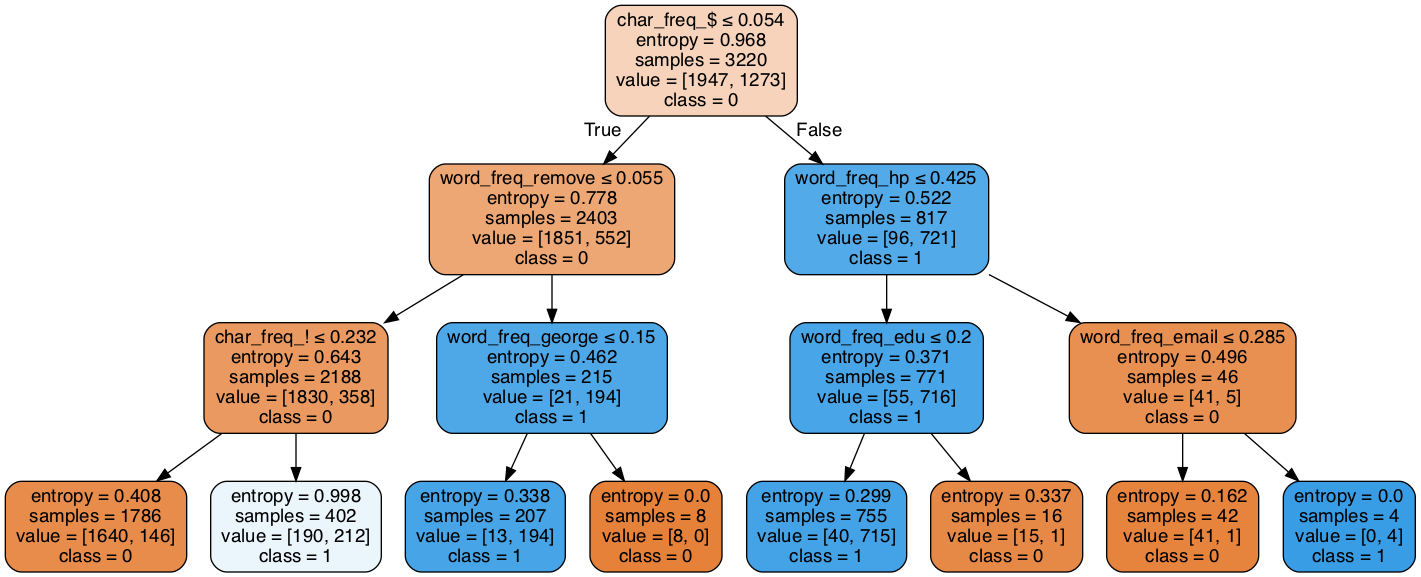

In [10]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
#pip install graphviz
#pip install pydotplus
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

# <font color='red'>Step 3: Classifier Using Random Forest</font>

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100, max_depth=3)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [13]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9102099927588704


# <font color='red'>Step 4: AUC Curve for Model Comparison</font>

In [14]:
from sklearn.metrics import accuracy_score, auc, roc_auc_score
import matplotlib.pyplot as plt

In [15]:
X_train_AUC, X_test_AUC, y_train_AUC, y_test_AUC = train_test_split(X, y, test_size=0.2)

In [16]:
aucs_CART = []
for depth in range(1, 100):
    dct = DecisionTreeClassifier(max_depth=depth)
    dct.fit(X_train_AUC, y_train_AUC)
    y_pred_AUC = dct.predict(X_test_AUC)
    aucs_CART.append(roc_auc_score(y_test_AUC, y_pred_AUC))
print("Decision Tree Precision:", accuracy_score(y_test_AUC, y_pred_AUC))
    

aucs_RF = []
for depth in range(1,100):
    rf = RandomForestClassifier(n_estimators=100, max_depth=depth)
    rf.fit(X_train_AUC, y_train_AUC)
    y_pred_AUC = rf.predict(X_test_AUC)
    aucs_RF.append(roc_auc_score(y_test_AUC, y_pred_AUC))
print("Random Forest Precision:", accuracy_score(y_test_AUC, y_pred_AUC))

Decision Tree Precision: 0.9077090119435396
Random Forest Precision: 0.9467969598262758


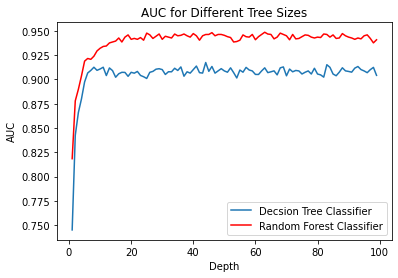

In [17]:
plt.plot(list(range(1, 100)), aucs_CART, label='Decsion Tree Classifier')
plt.plot(list(range(1, 100)), aucs_RF, color="red", label='Random Forest Classifier')

plt.title("AUC for Different Tree Sizes")
plt.xlabel("Depth")
plt.ylabel("AUC")
plt.legend()
plt.show()